# **Knight's Tour**

## 1.1. Dependencies

In [19]:
import networkx as nx
import pylab as pyl

from numpy import *

## Viable Moves

In [2]:
def MoveTo(i,j,n):
    knight_move=[]
    if 0<=(i+1)<=n-1 and 0<=(j+2)<=n-1:
        knight_move.append((i+1,j+2))
    if 0<=(i-1)<=n-1 and 0<=(j+2)<=n-1:
        knight_move.append((i-1,j+2))
    if 0<=(i+2)<=n-1 and 0<=(j+1)<=n-1:
        knight_move.append((i+2,j+1))   
    if 0<=(i-2)<=n-1 and 0<=(j+1)<=n-1:
        knight_move.append((i-2,j+1))   
    if 0<=(i+2)<=n-1 and 0<=(j-1)<=n-1:
        knight_move.append((i+2,j-1))
    if 0<=(i-2)<=n-1 and 0<=(j-1)<=n-1:
        knight_move.append((i-2,j-1))
    if 0<=(i+1)<=n-1 and 0<=(j-2)<=n-1:
        knight_move.append((i+1,j-2))
    if 0<=(i-1)<=n-1 and 0<=(j-2)<=n-1:
        knight_move.append((i-1,j-2))
    return knight_move

In [7]:
print(MoveTo(0,0,8))

[(1, 2), (2, 1)]


## Graphing Moves

In [9]:
def MyBoard(n):
    m=nx.Graph()
    for i in range(0,n):
        for j in range(0,n):
            m.add_node((i,j))
            for k in range(0,len(MoveTo(i,j,n))):
                knight_move=MoveTo(i,j,n)
                m.add_edge((i,j),knight_move[k])
    return m

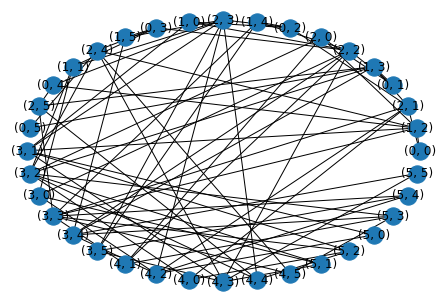

In [14]:
nx.draw_circular(MyBoard(6), with_labels=True)
pyl.show()

## How many times can each square be landed on?

In [20]:
def CountMoves(m):
    n=int(sqrt(m.number_of_nodes()))
    arr=zeros((n,n),int)
    for i in range(0,n):
        for j in range(0,n):
            arr[i,j]=(m.degree((i,j)))
    return arr

In [23]:
print(CountMoves(MyBoard(8)),'for an 8x8 board')

[[2 3 4 4 4 4 3 2]
 [3 4 6 6 6 6 4 3]
 [4 6 8 8 8 8 6 4]
 [4 6 8 8 8 8 6 4]
 [4 6 8 8 8 8 6 4]
 [4 6 8 8 8 8 6 4]
 [3 4 6 6 6 6 4 3]
 [2 3 4 4 4 4 3 2]] for an 8x8 board


## Finding the tour in tuples

In [5]:
def FindTour(i,j,n):
    Bn= MyBoard(n)
    curr_node=(i,j)
    tour=[]
    tour.append(curr_node)
    while curr_node in Bn:
        y=[]
        Nlist=list(Bn.neighbors(curr_node))
        for i in Nlist:
            y.append(Bn.degree(i))
        Bn.remove_node(curr_node)
        if len(y)==0:
            if Bn.number_of_nodes()==0:
                return tour
            else:
                print('Could not finish the tour')
        small=y.index(min(y))
        curr_node=Nlist[small]
        tour.append(curr_node)

In [24]:
print('The knights tour starting at (0,0) on an 8x8 board has the path:',FindTour(0,0,8))

The knights tour starting at (0,0) on an 8x8 board has the path: [(0, 0), (1, 2), (0, 4), (1, 6), (3, 7), (5, 6), (7, 7), (6, 5), (5, 7), (7, 6), (6, 4), (7, 2), (6, 0), (4, 1), (2, 0), (0, 1), (1, 3), (0, 5), (1, 7), (3, 6), (2, 4), (0, 3), (1, 1), (3, 0), (2, 2), (1, 0), (0, 2), (2, 1), (4, 0), (3, 2), (5, 1), (7, 0), (6, 2), (4, 3), (3, 1), (5, 0), (7, 1), (5, 2), (7, 3), (6, 1), (5, 3), (7, 4), (6, 6), (4, 5), (3, 3), (1, 4), (0, 6), (2, 5), (4, 4), (2, 3), (1, 5), (0, 7), (2, 6), (4, 7), (3, 5), (2, 7), (4, 6), (3, 4), (5, 5), (6, 7), (7, 5), (5, 4), (4, 2), (6, 3)]


## Visualising the tour

In [28]:
def vis_tour(i, j, n):
    new_arr = zeros((n,n), dtype = int)
    for b in MyBoard(n):
        new_arr[b] = FindTour(i,j,n).index(b)
    print(new_arr)

In [29]:
vis_tour(0,0,8)

[[ 0 15 26 21  2 17 46 51]
 [25 22  1 16 45 50  3 18]
 [14 27 24 49 20 47 52 55]
 [23 34 29 44 57 54 19  4]
 [28 13 62 33 48 43 56 53]
 [35 30 37 40 61 58  5  8]
 [12 39 32 63 10  7 42 59]
 [31 36 11 38 41 60  9  6]]
